In [87]:
import yaml
from stable_baselines import PPO2
from stable_baselines.common.vec_env import DummyVecEnv
import rl.helpers
import cv2
import math
import random
import statistics as sts
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import datetime as dt
from os.path import join, listdir
import pathlib
import numpy as np

environment = 'ConveyorEnv1'

config_path = 'rl/config/{}.yml'.format(environment)
with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

#initialize env with the config file
env_obj = getattr(rl.environments, environment)
env = env_obj(config)


def get_max(configurations, label):
    maxes = []
    for no_gtp, output in configurations:
        maxes.append(max(all_results['{}x{}'.format(no_gtp, output)][label]))
        
    return max(maxes)

def normalize(list_in, maxin=None):
    '''
    Normalizes values in a list based on max var
    paramin: list
    paramout: list normalized
    '''
    if maxin is not None:
        maxvar = maxin
    else:
        maxvar = max(list_in)
    if maxvar == 0:
        return list_in
    else:
        return [var / maxvar for var in list_in]

print('Model Parameters are: \n')
print('\t Queue length:\t\t\t{} \n \t Pipeline length: \t\t{}'.format(env.gtp_buffer_length, env.pipeline_length))
print('\t Amount GtP:\t\t\t{} \n \t Types of order carriers: \t{}'.format(env.amount_of_gtps, env.amount_of_outputs))
print('\t To process orders:\t\t{}/{} \n \t Termination condition: \t{}\n'.format(env.max_items_processed, env.amount_of_gtps*env.gtp_demand_size, env.termination_condition))
env.render_plt()

ImportError: cannot import name 'listdir' from 'ntpath' (c:\users\_vinc\appdata\local\programs\python\python37\lib\ntpath.py)

In [33]:
env.reset()
while env.terminate == False:
    action = env.action_space.sample()
    env.step(action)
    for _ in range(3):
        env.step(0)
print('\n')        
print('Idle time operators: \t\t {}'.format(sum(env.idle_times_operator.values())))
print('recirculation carriers: \t {}'.format(env.cycle_count))
print('Steps: \t\t\t\t {}'.format(env.steps))

Ep:    10, steps: 920, R: -564.000

Idle time operators: 		 1059
recirculation carriers: 	 401
Steps: 				 1248


In [50]:
configurations = [
    [1,2],
    [2,2],
    [2,3],
    [3,3],
    [4,3],
    [5,3],
]

# calculate mean performance for idle time and recirculation of carriers

all_results = {}

for configuration in configurations:
    
    no_gtp, output= configuration
    all_results['{}x{}'.format(no_gtp, output)] = {}
    all_results['{}x{}'.format(no_gtp, output)]['idle_time'] = []
    all_results['{}x{}'.format(no_gtp, output)]['cycle_count'] =[]
    all_results['{}x{}'.format(no_gtp, output)]['steps'] =[]
    all_results['{}x{}'.format(no_gtp, output)]['W_times'] =[]
    all_results['{}x{}'.format(no_gtp, output)]['items_processed'] = []
    
    config['environment']['amount_of_gtps'] = no_gtp
    config['environment']['amount_of_outputs'] = output
    
    env = env_obj(config)

    no_episodes = 100
    print('Start run for {}x{} design'.format(no_gtp, output))
    for episode in range(no_episodes):
        print('episode: {} \t steps: \t {}'.format(episode, env.steps), end='\r')
        env.reset()
        while not env.terminate:
            action = env.action_space.sample()
            env.step(action)
        all_results['{}x{}'.format(no_gtp, output)]['idle_time'].append(sum(env.idle_times_operator.values()))
        all_results['{}x{}'.format(no_gtp, output)]['cycle_count'].append(env.cycle_count)
        all_results['{}x{}'.format(no_gtp, output)]['steps'].append(env.steps)
        all_results['{}x{}'.format(no_gtp, output)]['W_times'].append(sum(env.W_times.values()) / len(env.W_times))
        all_results['{}x{}'.format(no_gtp, output)]['items_processed'].append(env.items_processed)
        
#     all_results['{}x{}'.format(no_gtp, output)]['idle_time'] = all_results['{}x{}'.format(no_gtp, output)]['idle_time'] / no_episodes
#     all_results['{}x{}'.format(no_gtp, output)]['cycle_count'] = all_results['{}x{}'.format(no_gtp, output)]['cycle_count'] / no_episodes
#     all_results['{}x{}'.format(no_gtp, output)]['steps'] = all_results['{}x{}'.format(no_gtp, output)]['steps'] / no_episodes
#     all_results['{}x{}'.format(no_gtp, output)]['W_times'] = all_results['{}x{}'.format(no_gtp, output)]['W_times'] / no_episodes
#     all_results['{}x{}'.format(no_gtp, output)]['items_processed'] = all_results['{}x{}'.format(no_gtp, output)]['items_processed'] / no_episodes
# resultcsv = pd.DataFrame.from_dict(all_results).T
# resultcsv

Start run for 1x2 design
Start run for 2x2 design: -2116.000
Start run for 2x3 design: -1916.000
Start run for 3x3 design: -2106.000
Start run for 4x3 design: -1956.000
Start run for 5x3 design: -2016.000


In [62]:
reported_result = {}
for configuration in configurations:
    no_gtp, output= configuration
    reported_result['{}x{}'.format(no_gtp, output)] = {}
    reported_result['{}x{}'.format(no_gtp, output)]['idle_time_m'] = sts.mean(all_results['{}x{}'.format(no_gtp, output)]['idle_time'])
    reported_result['{}x{}'.format(no_gtp, output)]['idle_time_std'] = sts.stdev(all_results['{}x{}'.format(no_gtp, output)]['idle_time'])
    reported_result['{}x{}'.format(no_gtp, output)]['cycle_count_m'] = sts.mean(all_results['{}x{}'.format(no_gtp, output)]['cycle_count'])
    reported_result['{}x{}'.format(no_gtp, output)]['cycle_count_std'] = sts.stdev(all_results['{}x{}'.format(no_gtp, output)]['cycle_count'])
    reported_result['{}x{}'.format(no_gtp, output)]['steps_m'] = sts.mean(all_results['{}x{}'.format(no_gtp, output)]['steps'])
    reported_result['{}x{}'.format(no_gtp, output)]['steps_std'] = sts.stdev(all_results['{}x{}'.format(no_gtp, output)]['steps'])
    reported_result['{}x{}'.format(no_gtp, output)]['W_times_m'] = sts.mean(all_results['{}x{}'.format(no_gtp, output)]['W_times'])
    reported_result['{}x{}'.format(no_gtp, output)]['W_times_std'] = sts.stdev(all_results['{}x{}'.format(no_gtp, output)]['W_times'])
    reported_result['{}x{}'.format(no_gtp, output)]['items_processed_m'] = sts.mean(all_results['{}x{}'.format(no_gtp, output)]['items_processed'])
    reported_result['{}x{}'.format(no_gtp, output)]['items_processed_std'] = sts.stdev(all_results['{}x{}'.format(no_gtp, output)]['items_processed'])

resultcsv = pd.DataFrame.from_dict(reported_result).T
resultcsv

,idle_time_m,idle_time_std,cycle_count_m,cycle_count_std,steps_m,steps_std,W_times_m,W_times_std,items_processed_m,items_processed_std
1x2,0.00,0.000000,400.88,1.200000,496.10,12.809009,12.660000,9.505150,25.71,3.893260
2x2,32.41,67.530030,399.17,18.300000,530.56,29.141009,11.395000,6.695881,54.51,6.931840
2x3,4.16,19.307046,401.00,0.000000,499.10,9.857059,24.705000,12.303218,29.46,3.960461
3x3,60.64,122.858259,401.00,0.000000,524.73,13.432100,19.753333,11.109153,45.10,5.151248
4x3,136.45,152.062811,400.74,2.600000,549.21,17.144835,19.812500,10.962999,60.69,7.451791
5x3,254.00,216.817383,391.26,19.385833,559.90,20.962930,17.130000,9.695417,74.08,7.615349


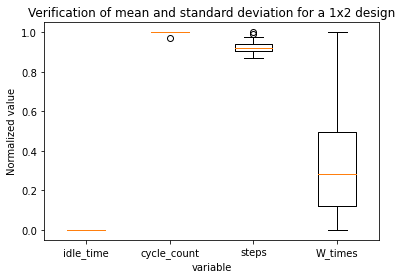

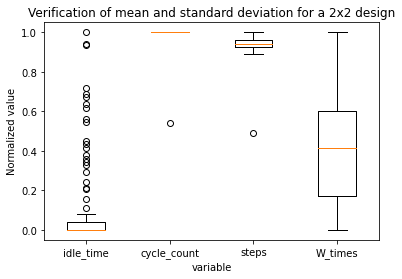

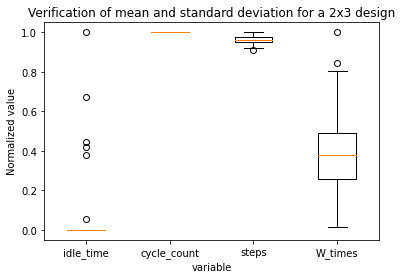

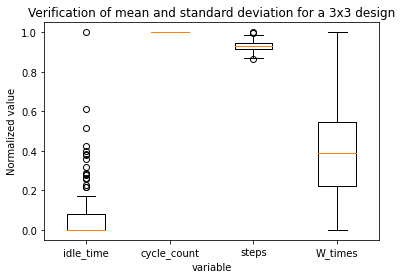

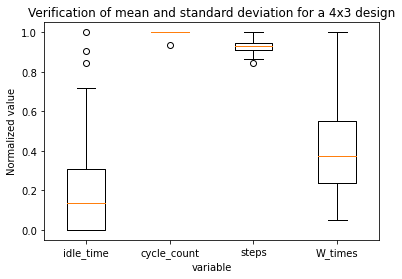

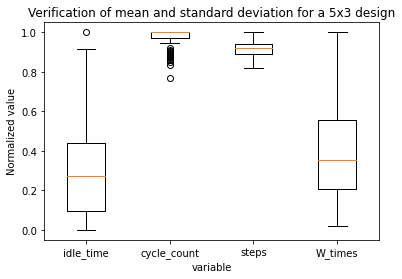

In [76]:
import matplotlib.pyplot as plt
for no_gtp, output in configurations:
    to_log = ['idle_time', 'cycle_count', 'steps', 'W_times']

    data = [normalize(all_results['{}x{}'.format(no_gtp, output)][log_name]) for log_name in to_log]
    plt.boxplot(data, labels=to_log)


    plt.ylabel('Normalized value')
    plt.xlabel('variable')
    plt.title('Verification of mean and standard deviation for a {}x{} design'.format(no_gtp, output))
    plt.show()

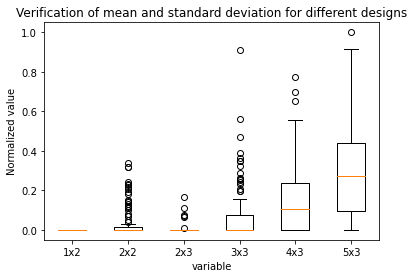

In [83]:
import matplotlib.pyplot as plt

labels = ['1x2', '2x2', '2x3', '3x3', '4x3', '5x3']

data = [normalize(all_results['{}x{}'.format(no_gtp, output)]['idle_time'], get_max(configurations, 'idle_time')) for no_gtp, output in configurations]
plt.boxplot(data, labels=labels)


plt.ylabel('Normalized value')
plt.xlabel('variable')
plt.title('Verification of mean and standard deviation for different designs'.format(no_gtp, output))
plt.show()

In [49]:
resultcsv.to_csv('evaluation_results/result_designs_random_agent.csv')